In [1]:
using Polynomials,LinearAlgebra,Plots,DataFrames,CSV

### Task 1 - Factorization methods comparison

In [6]:
x = rand(1000)
A = rand(1000,1000)
b = A*x 

df = DataFrame(Method=String[],VectorDifference=Float64[],Time=Float64[])

for i in 1:2
    inv_method = x - inv(A)*b
    inv_diff = sqrt(dot(inv_method,inv_method))
    inv_time = @elapsed inv(A)*b
    
    opt_method = x - A\b
    opt_diff = sqrt(dot(opt_method,opt_method))
    opt_time = @elapsed A\b
    
    Af = factorize(A)
    fact_method = x - Af\b
    fact_diff = sqrt(dot(fact_method,fact_method))
    fact_time = @elapsed factorize(A)\b
    if i!=1
        push!(df,("inv",inv_diff,inv_time))
        push!(df,("/",opt_diff,opt_time))
        push!(df,("factorize",fact_diff,fact_time))
    end
end

df

Row,Method,VectorDifference,Time
,String,Float64,Float64
1,inv,7.83481e-11,0.0831541
2,/,5.554e-11,0.0424555
3,factorize,5.554e-11,0.0266214


### Task 2 - Calculating approximating polynomial's coefficients

In [14]:
df = CSV.read("ecg_data.csv", DataFrame)
x = df.time;
y = df.signalV;

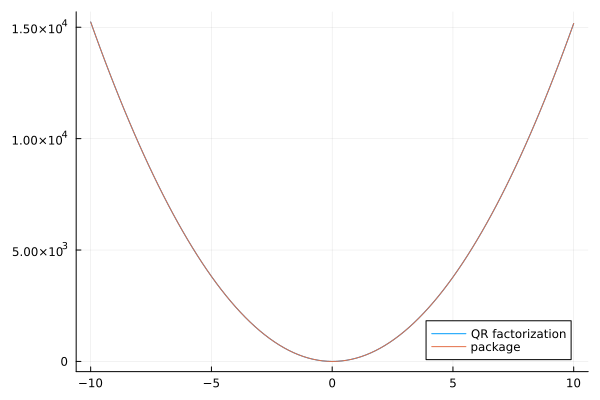

In [15]:
A = zeros(73,3) 
A[:,1]=x.^2
A[:,2]=x
A[:,3]=ones(73)

AF=factorize(A)
Q=Matrix(AF.Q)
approx = AF.R\((Transpose(Q)*y)[1:3])
poly_approx = Polynomial(approx)
poly = fit(x,y,2)

xs = -10:10
plot(poly_approx,extrema(xs)...,label="QR factorization")
plot!(poly,extrema(xs)...,label="package")

### Task 3 - QR algorithm

The QR algorithm computes the eigenvalues and eigenvectors of a matrix. It consists of the following steps:

1. Let $A_0 = A$
2. At the k-th step (starting with k = 0), we compute the QR decomposition: $A_k = Q_k R_k$ where $Q_k$ is an orthogonal matrix and $R_k$ is an upper triangular matrix.
3. Then $A_{k+1} = R_k Q_k$
4. Note that: $A_{k+1} = R_k Q_k = Q_k^{-1} Q_k R_k Q_k = Q_k^{-1} A_k Q_k = Q_k^{T} A_k Q_k$ <br>
So all $A_k$ are similar and hence they have the same eigenvalues

In [29]:
function qr_algorithm(A, n)
    for i in 1:n
        Af = qr(A)
        A = Af.Q' * A * Af.Q
    end
    values = [A[i,i] for i in 1:size(A,1)]
end

qr_algorithm (generic function with 1 method)

We can use Gershgorin theorem to identify a region(looks like disk) in the complex plane that contains all the eigenvalues of a complex square matrix.

In [30]:
function abs_sum(A, i)
    result = 0
    for j in 1:size(A,2)
        if j != i
           result += abs(A[i,j]) 
        end
    end
    result    
end

function get_disks(A)
    disks = []
    for i in 1:size(A,1)
       push!(disks, (A[i,i],abs_sum(A, i))) 
    end
    disks
end

function draw_circle(h,k,r)
    theta = 0:0.01:2*pi
    h .+ r*sin.(theta), k.+ r*cos.(theta)
end

function get_coords(ev)
    ev_plot = [(e,0) for e in ev]
end;

In [37]:
A = rand(5,5)
ev = qr_algorithm(A,20)
ev_plot = get_coords(ev)
disks = get_disks(A);

In [40]:
ev

5-element Vector{Float64}:
  3.089351597238388
 -0.5465397803142681
  0.511505721719376
 -0.3417648011745654
 -0.13177477972403884

In [41]:
colors = [:red, :orange, :yellow, :pink, :blue]
disks_plot = scatter(xlabel = "Real", ylabel = "Imaginary", legend=:topright)

for i in 1:size(disks,1)
    d = disks[i]
    scatter!(ev_plot[i],
             color = colors[i],
             markershape=:circle, 
             markerstrokecolor=:black,
             markerstrokealpha=0.6,
             markersize=5,
             label = "",
             fillalpha = 0.25
    )
    plot!(draw_circle(d[1],0,d[2]), 
          color = colors[i], 
          fillalpha = 0.25, 
          label = ""
    )
end;

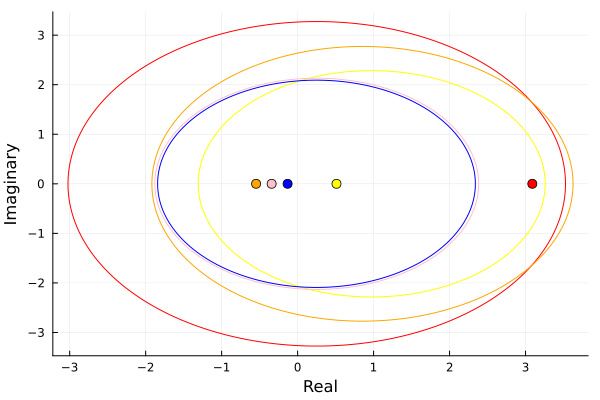

In [39]:
disks_plot